# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observable Trends
* Observation 1: The highest temperature is found at 0 latitude and as the latitude increase or decreases the temperature begins to drop. This is becuase of the angle in which the region recieved the sunlight
* Observation 2: The southern and northern hemisphere has reverse patterns with temperature. As latitiude increases the nothern hemisphere temperature decreases. Vice versa, as latitude increases the southern hemisphere temperature increases. 
* Oberservaion 3: Wind speed seems to not be affected and has no correlation to latitude.

In [13]:
# Depndensies and API's
import matplotlib.pyplot as plt
import requests
import pandas as pd
from api_keys import weather_api_key
import numpy as np
from citipy import citipy
import pprint as pprint
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Output file into csv
output_data_file = "../output_data/weather_cities.csv"

## Generate Cities List

In [14]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# URL for Weather Map API
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Create lists to append API data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


# record counter and set counter
counter = 1
index_counter = 0

# Log print statements
print(f'Beginning Data Retrieval')
print(f'-------------------------------')

# Loop through the cities in the generated city list
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 1
            counter = counter + 1
    
        else:
            index_counter = index_counter + 1
        
            
        print(f"Processing Record {index_counter} of Set {counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")





ng Record 28 of Set 2 : aripuana
Processing Record 29 of Set 2 : provideniya
Processing Record 30 of Set 2 : kieta
Processing Record 31 of Set 2 : daye
Processing Record 32 of Set 2 : bluff
Processing Record 33 of Set 2 : sal rei
Processing Record 34 of Set 2 : santa cruz
Processing Record 35 of Set 2 : neyvo-shaytanskiy
Processing Record 36 of Set 2 : sao filipe
Processing Record 37 of Set 2 : hovd
Processing Record 38 of Set 2 : ilulissat
Processing Record 39 of Set 2 : esperance
Processing Record 40 of Set 2 : dmitriyevka
City not found. Skipping...
Processing Record 41 of Set 2 : lata
Processing Record 42 of Set 2 : goderich
Processing Record 43 of Set 2 : russell
Processing Record 44 of Set 2 : carutapera
Processing Record 45 of Set 2 : hobart
Processing Record 46 of Set 2 : te anau
Processing Record 47 of Set 2 : salalah
City not found. Skipping...
Processing Record 48 of Set 2 : saskylakh
Processing Record 49 of Set 2 : kasongo-lunda
Processing Record 50 of Set 2 : verkhoyansk
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Create a dictionary with lists for DF
weather_dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng, 
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,
    "Wind Speed": wind_speed
}

# Weather data frame
weather_data = pd.DataFrame(weather_dict)
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,95,US,1599100533,91,42.60,-73.97,73.99,3.74
1,Kruisfontein,0,ZA,1599100616,38,-34.00,24.73,60.01,1.01
2,Gerāsh,0,IR,1599100706,43,27.67,54.14,73.40,2.42
3,Torbay,90,CA,1599100523,71,47.67,-52.73,55.00,12.75
4,Thinadhoo,100,MV,1599100706,75,0.53,72.93,82.24,13.38


In [17]:
# Save city data into a csv file
weather_data.to_csv("../output_data/weather_cities.csv", index = False)

In [18]:
weather_data.describe()


,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,528.000000,5.280000e+02,528.000000,528.000000,528.000000,528.000000,528.000000
mean,46.179924,1.599101e+09,70.873106,19.891515,17.045682,67.581742,7.978485
std,39.327842,2.235001e+02,20.994465,33.514927,90.563354,14.416710,5.401963
min,0.000000,1.599100e+09,1.000000,-54.800000,-175.200000,24.130000,0.130000
25%,1.000000,1.599100e+09,59.750000,-7.705000,-67.057500,56.602500,3.740000
50%,40.000000,1.599101e+09,76.000000,22.810000,25.040000,68.645000,6.930000
75%,85.250000,1.599101e+09,87.000000,48.132500,95.090000,79.582500,11.242500
max,100.000000,1.599101e+09,100.000000,78.220000,179.320000,98.600000,32.480000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
#N/A

In [20]:
#  Get the indices of cities that have humidity over 100%.
# N/A

In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_dataclean_city_data = weather_data
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,95,US,1599100533,91,42.60,-73.97,73.99,3.74
1,Kruisfontein,0,ZA,1599100616,38,-34.00,24.73,60.01,1.01
2,Gerāsh,0,IR,1599100706,43,27.67,54.14,73.40,2.42
3,Torbay,90,CA,1599100523,71,47.67,-52.73,55.00,12.75
4,Thinadhoo,100,MV,1599100706,75,0.53,72.93,82.24,13.38


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

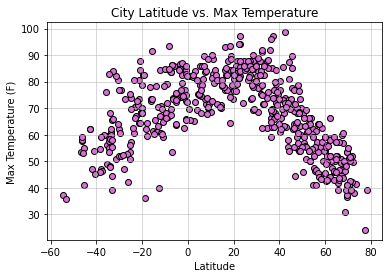

In [22]:
# Build Lat and Temp scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], facecolor = "orchid", edgecolor = "black")

# Extras
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

The highest temperature is found at 0 latitude and as the latitude increases or decreases, temperature drops

## Latitude vs. Humidity Plot

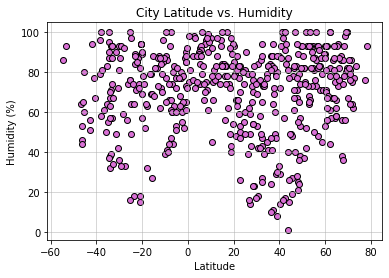

In [23]:
# Build Lat and Humidity scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], facecolor = "orchid", edgecolor = "black")

# Extras
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

Polar regions have lower humidity and as latitude gets higher humidity gets higher in southern hemisphere

## Latitude vs. Cloudiness Plot

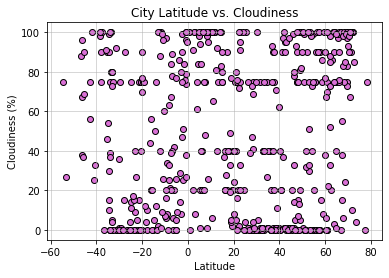

In [24]:
# Build Lat and Cloudiness scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], facecolor = "orchid", edgecolor = "black")

# Extras
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

Cloudiness data is widely spread across the latitude

## Latitude vs. Wind Speed Plot

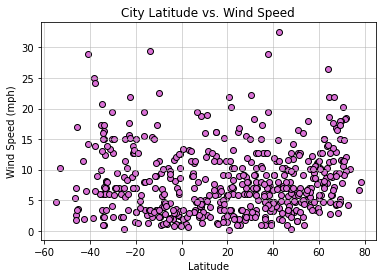

In [25]:
# Build Lat and Wind Speed scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], facecolor = "orchid", edgecolor = "black")

# Extras
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

Wind speed data is widely spread across the latitude

## Linear Regression

In [26]:
# Create the two hemispheres
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

# Define a function to call for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction to call for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.78


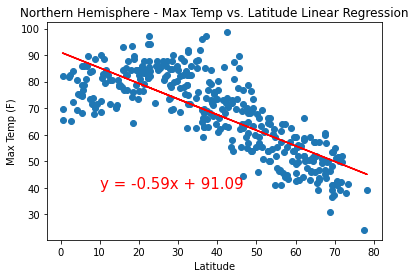

In [27]:
# Call linear function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call annotate function #2
annotate(equation, 10, 40)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a negative correlation between latitude and max temperature for the northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.63


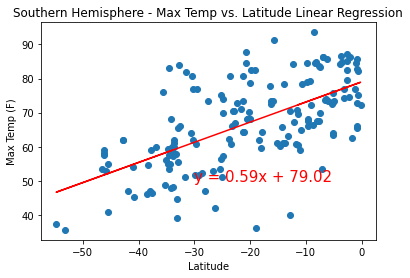

In [28]:
# Call linear function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call annotate function #2
annotate(equation, -30, 50)

# Extras
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a moderate positive correlation between latitude and max temperature for southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.02


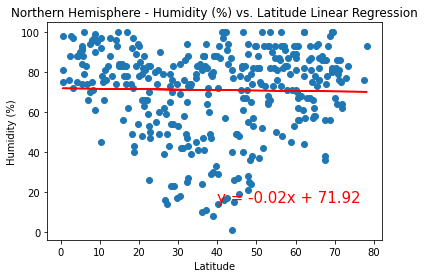

In [29]:
# Call linear function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call annotate function #2
annotate(equation, 40, 15)

# Extras
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There is a weak positive correlatin between humidty and latitude for northern hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.06


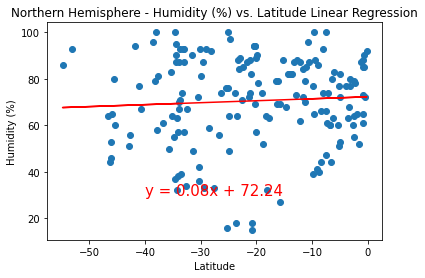

In [30]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call annotate function #2
annotate(equation, -40, 30)

# Extras
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Sorthern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There is a weak negative correlation between latitude and humidy for southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.07


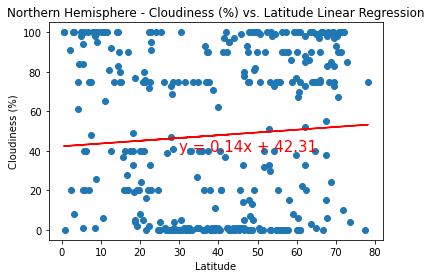

In [31]:
# Call linear function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call annotate function #2
annotate(equation, 30, 40)

# Extra
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")



There is a weak postiive correlation between cloudiness and latitude for northen hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.02


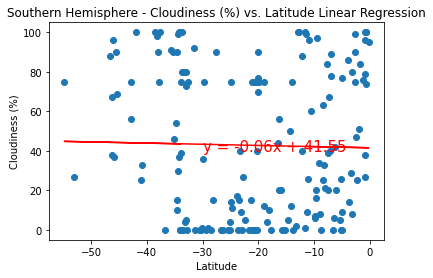

In [32]:
# Call linear function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call annotate function #2
annotate(equation, -30, 40)

# Extras
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is a weak negative corelation between cloudiness and latitude for southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.2


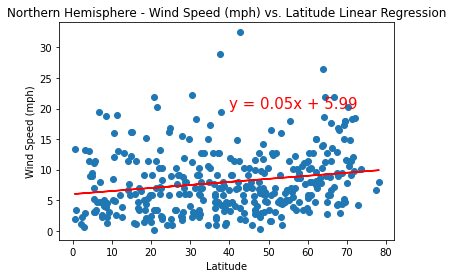

In [33]:
# Call linear function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call annotate function #2
annotate(equation, 40, 20)

# Extras
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There is a week positive correlation between wind speed and latitude in nothern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.23


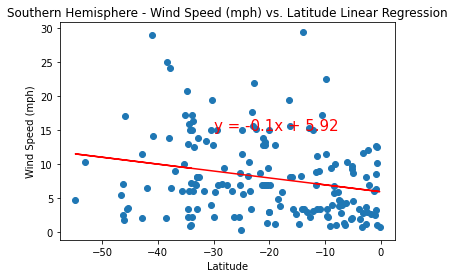

In [34]:
# Call linear function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call annotate function #2
annotate(equation, -30, 15)

# Extras
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There is a weak negative correlation between wind speed and latitude in southern hemisphere. 